# Marketing Mix Model

Adrian P. Bustamante, Ph.D.

adrianpebus@gmail.com

### __Table of Contents__

<ol>
    <li><a href="#Data-Acquisition,-preparation-and-visualization">Data Acquisition, preparation, and visualization</a></li>
    <li><a href="#ADL-model-to-predict-sales">ADL model to predict sales</a></li>
    <li><a href="#Predictions-and-interpretability">Predictions and interpretability</a></li>
</ol>

## Objectives

I consider an advertising dataset capturing the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers.
The dataset can be found at https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset/data

Objective: Build a Mix Marketing Model to predict sales and interpret the impact of each channel on Sales.

## Data Acqusition, preparation and visualization

In [3]:
#!pip3 install -U kagglehub

In [2]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("yasserh/advertising-sales-dataset")
print("Path to dataset files:", path)

Path to dataset files: /home/adrian/.cache/kagglehub/datasets/yasserh/advertising-sales-dataset/versions/1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
#library versions
import sklearn, matplotlib
sklearn.__version__, pd.__version__, sns.__version__, matplotlib.__version__, np.__version__

('1.5.0', '2.1.4', '0.13.2', '3.9.0', '1.26.0')

In [5]:
data = pd.read_csv(path + '/Advertising Budget and Sales.csv')
data.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
## droping the columns and changing the names of columns
data =data.drop('Unnamed: 0', axis=1)
df = data.copy()
df.columns = ['tv', 'radio', 'newspaper', 'sales']
df.head()

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0.5, 1.0, 'Newspaper Advertising')

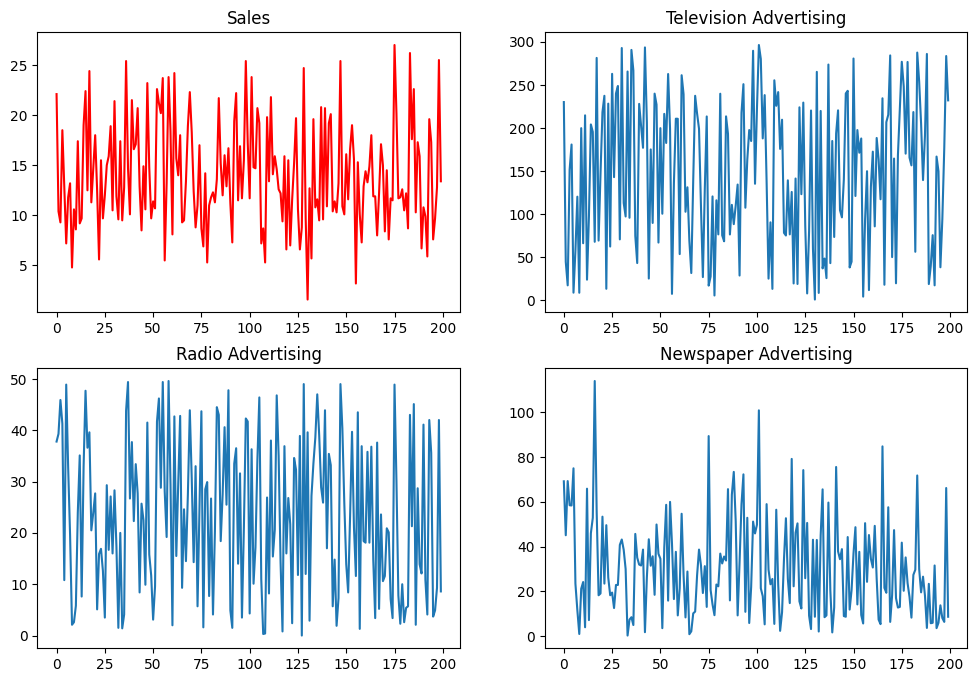

In [8]:
## visualizing data as time series
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0,0].plot(np.arange(len(df['sales'])), df['sales'], label='Sales', color = 'red')
axs[0,0].set_title('Sales')

axs[0,1].plot(np.arange(len(df['tv'])), df['tv'], label='TV Advertising level')
axs[0,1].set_title('Television Advertising')

axs[1,0].plot(np.arange(len(df['radio'])), df['radio'])
axs[1,0].set_title('Radio Advertising')

axs[1,1].plot(np.arange(len(df['newspaper'])), df['newspaper'])
axs[1,1].set_title('Newspaper Advertising')

#### Normalization

Text(0.5, 1.0, 'Newspaper Advertising')

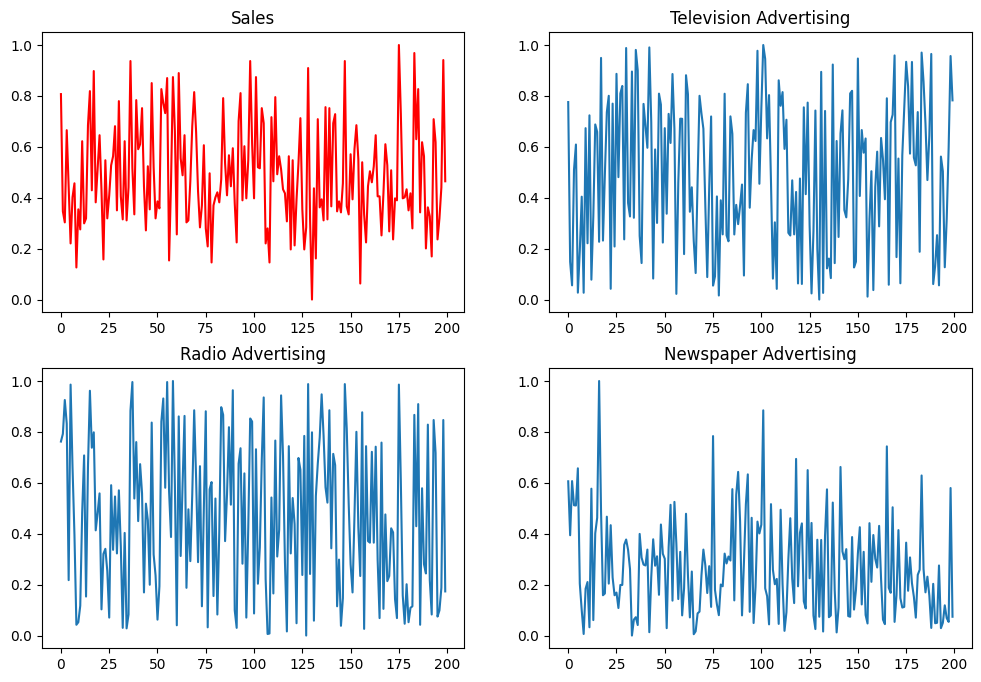

In [9]:
df_scaled = MinMaxScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0,0].plot(np.arange(len(df_scaled['sales'])), df_scaled['sales'], label='Sales', color = 'red')
axs[0,0].set_title('Sales')

axs[0,1].plot(np.arange(len(df_scaled['tv'])), df_scaled['tv'], label='TV Advertising level')
axs[0,1].set_title('Television Advertising')

axs[1,0].plot(np.arange(len(df_scaled['radio'])), df_scaled['radio'])
axs[1,0].set_title('Radio Advertising')

axs[1,1].plot(np.arange(len(df_scaled['newspaper'])), df_scaled['newspaper'])
axs[1,1].set_title('Newspaper Advertising')

#### Pairplots

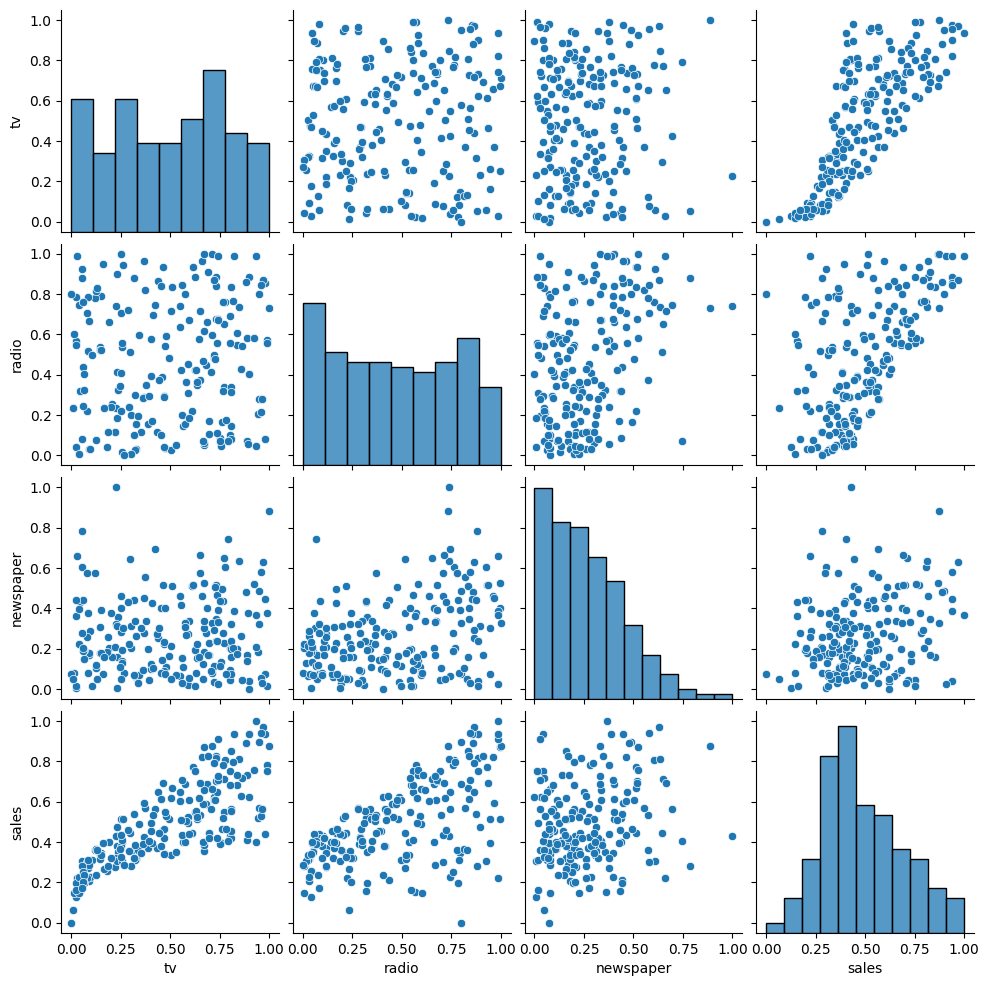

In [10]:
sns.pairplot(data=df_scaled)

Plots suggest a positive correlation between sales and tv ads

##### Sample correlations

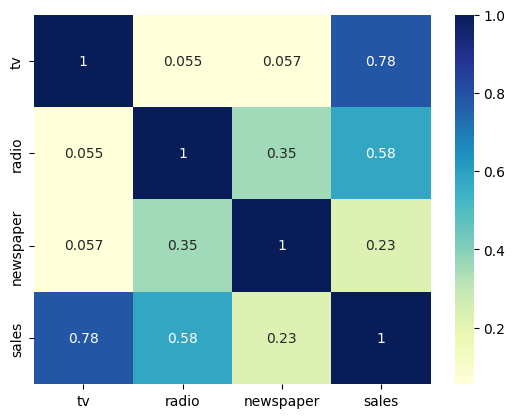

In [11]:
sns.heatmap(df.corr(), annot=True, cmap = 'YlGnBu')
plt.show()

Sample correlation analysis also shows a positive correlation between tv ads and sales.

## ADL model to predict sales

We use the following simple ADL (Autoregressive Distributed Lag) model to predict sales $$ Y_t = \alpha + \beta_1 Y_{t-1} + \gamma_1 X_{1,t} + \gamma_2 X_{2,t} + \gamma_3 X_{3,t} + \gamma_4 X_{1,t-1} + \gamma_5 X_{2, t-1} + \gamma_6 X_{3, t-1} +\varepsilon_t$$ where $X_{1,t}, X_{2,t}, X_{3,t}$ represent the current values of tv, radio, and newspaper advertising values, respectively, while $X_{1,t-1}, X_{2,t-1}, X_{3,t-1}$ represent their lagged values (Adstock). $Y_t$ represent the sells values and $\varepsilon_t$ represents random noise. 

### Creating lagged features

In [12]:
df_scaled['sales_lag'] = df_scaled['sales'].shift(1)
df_scaled['tv_lag'] = df_scaled['tv'].shift(1)
df_scaled['radio_lag'] = df_scaled['radio'].shift(1)
df_scaled['newspaper_lag'] = df_scaled['newspaper'].shift(1)
df_scaled.head()

,tv,radio,newspaper,sales,sales_lag,tv_lag,radio_lag,newspaper_lag
0,0.775786,0.762097,0.605981,0.807087,NaN,NaN,NaN,NaN
1,0.148123,0.792339,0.394019,0.346457,0.807087,0.775786,0.762097,0.605981
2,0.055800,0.925403,0.606860,0.303150,0.346457,0.148123,0.792339,0.394019
3,0.509976,0.832661,0.511873,0.665354,0.303150,0.055800,0.925403,0.606860
4,0.609063,0.217742,0.510994,0.444882,0.665354,0.509976,0.832661,0.511873


In [13]:
##droping rows with NaN values (due to lagging)
df_scaled = df_scaled.dropna()
df_scaled.head()

,tv,radio,newspaper,sales,sales_lag,tv_lag,radio_lag,newspaper_lag
1,0.148123,0.792339,0.394019,0.346457,0.807087,0.775786,0.762097,0.605981
2,0.055800,0.925403,0.606860,0.303150,0.346457,0.148123,0.792339,0.394019
3,0.509976,0.832661,0.511873,0.665354,0.303150,0.055800,0.925403,0.606860
4,0.609063,0.217742,0.510994,0.444882,0.665354,0.509976,0.832661,0.511873
5,0.027054,0.985887,0.656992,0.220472,0.444882,0.609063,0.217742,0.510994


In [14]:
##Target Variable 
y = df_scaled['sales']
#Independent variable for regression, I put them in order
X = df_scaled[['sales_lag', 'tv', 'radio', 'newspaper', 'tv_lag', 'radio_lag', 'newspaper_lag']]

### Train and test set

we use the last 20% rows as test set, the first 80% rows as train set

In [15]:
n = len(df_scaled)
y_train = y[:int(0.8*n)]
y_test = y[int(0.8*n):]
X_train = X[:int(0.8*n)]
X_test = X[int(0.8*n):]

Text(0.5, 0, 'time')

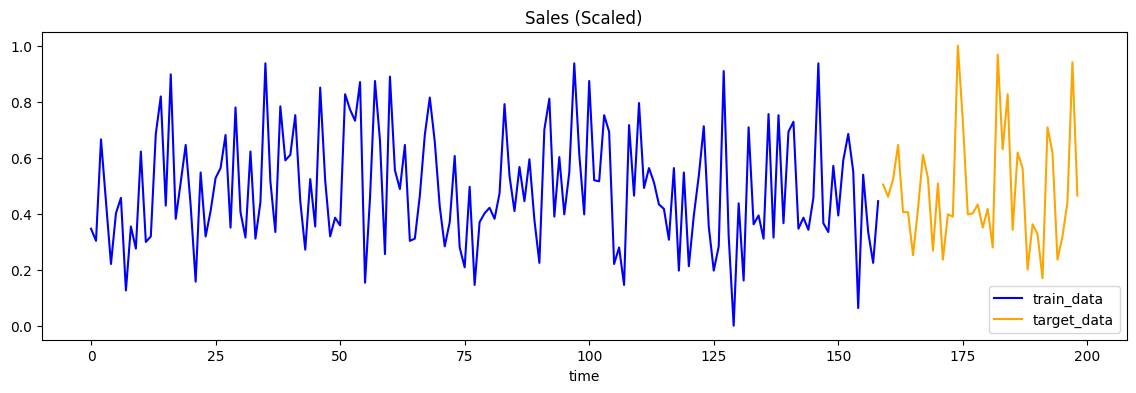

In [16]:
#visualizing the sets
target_ticks = np.array(range(int(0.8*n), n))
train_ticks = np.array(range(int(0.8*n)))      
        
fig = plt.figure(figsize=(14, 4))
        
ax = fig.add_subplot(1,1,1)
ax.plot(train_ticks, y_train, label='train_data', color='blue')
ax.plot(target_ticks, y_test, label='target_data', color='orange')
ax.legend()
ax.set_title('Sales (Scaled)')
ax.set_xlabel('time')

### Finding the coefficients of the linear model using a linear regression

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
### Coefficients of the regression, Used later for interpretation
gamma = model.coef_
model.coef_

array([-0.06216904,  0.55006788,  0.35102065, -0.00932593,  0.05099623,
        0.03396678, -0.02560104])

In [19]:
model.intercept_

0.05201422893119906

## Predictions and interpretability

In [20]:
yhat = model.predict(X_test)

Text(0.5, 0, 'time')

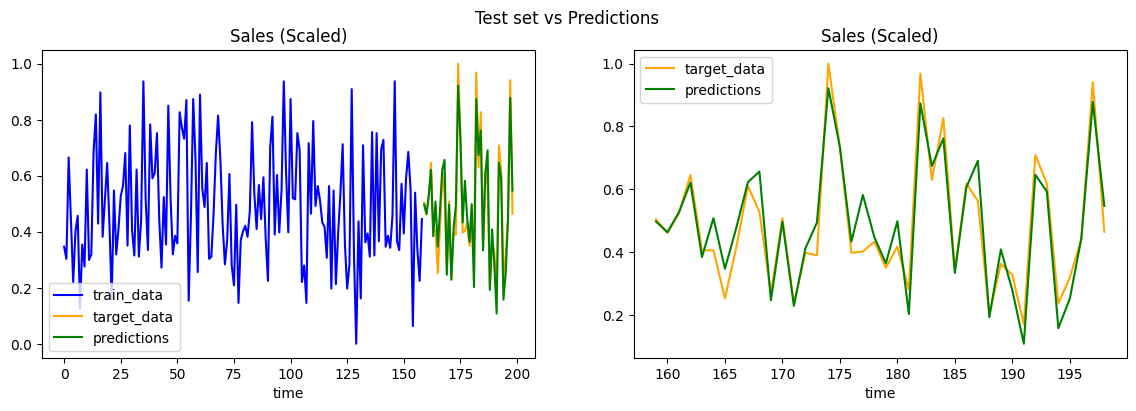

In [21]:
target_ticks = np.array(range(int(0.8*n), n))
train_ticks = np.array(range(int(0.8*n)))      
        
fig = plt.figure(figsize=(14, 4))
fig.suptitle('Test set vs Predictions')
        
ax = fig.add_subplot(1,2,1)
ax.plot(train_ticks, y_train, label='train_data', color='blue')
ax.plot(target_ticks, y_test, label='target_data', color='orange')
ax.plot(target_ticks, yhat, label = 'predictions', color='green')
ax.legend()
ax.set_title('Sales (Scaled)')
ax.set_xlabel('time')

ax = fig.add_subplot(1,2,2)
ax.plot(target_ticks, y_test, label='target_data', color='orange')
ax.plot(target_ticks, yhat, label = 'predictions', color='green')
ax.legend()
ax.set_title('Sales (Scaled)')
ax.set_xlabel('time')



### Some metrics

In [22]:
print('r2_score test set =', r2_score(y_test, yhat))
print('MSE test set = ', mean_squared_error(y_test, yhat))
print('r2_score train set =', r2_score(y_train, model.predict(X_train)) )
print('MSE train set = ', mean_squared_error(y_train, model.predict(X_train)))

r2_score test set = 0.8963426822293868
MSE test set =  0.004290505335596609
r2_score train set = 0.8967032141326612
MSE train set =  0.004312516135110664


#### Interpretability

In [23]:
#### Impact of the channels to the Sells

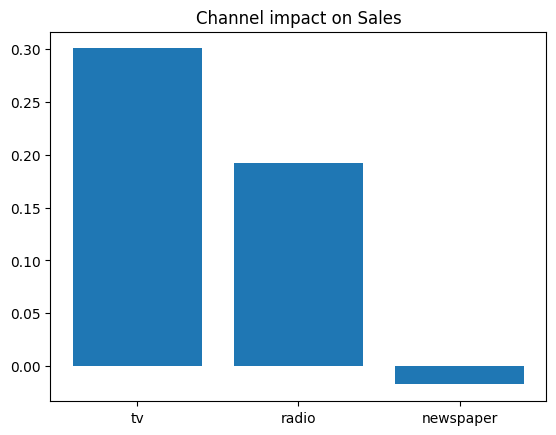

In [24]:
tv_impact = (gamma[1] + gamma[4])/2
radio_impact = (gamma[2] + gamma[5])/2
newspaper_impact = (gamma[3] + gamma[6])/2

channels = ['tv', 'radio', 'newspaper']
values = [tv_impact, radio_impact, newspaper_impact]

plt.bar(channels, values)
plt.title('Channel impact on Sales')
plt.show()

Based on this simple model, and also considering the the exploratoriy data analysis at the beginning, I would advice to reduce advertising in Newspapers. The present analysis does not provides evidence that the newspaper channel helps to increase the sales.